In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import natsort
from openpyxl import load_workbook
import random
from random import randrange
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras

from keras import models
from keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

Using TensorFlow backend.


IMPORT MODEL AND DATA

In [2]:
#load model
model = load_model('./for_old23/standard_MFCC_Dense_Classifier_l-3_u-2048_e-1000_1588149488.h5')
# plot_model(model, to_file='standard_MFCC_Dense_Classifier_model.png', show_shapes=True,show_layer_names=True)

In [3]:
#read test dataset from csv
# librispeech
data5_unseen_10 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data5_unseen_10ms.csv')
data5_unseen_50 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data5_unseen_50ms.csv')
data5_unseen_100 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data5_unseen_100ms.csv')
data5_unseen_500 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data5_unseen_500ms.csv')
data5_unseen_1000 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data5_unseen_1000ms.csv')
# musan
#music
data6_unseen_10 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data6_unseen_10ms.csv')
data6_unseen_50 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data6_unseen_50ms.csv')
data6_unseen_100 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data6_unseen_100ms.csv')
data6_unseen_500 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data6_unseen_500ms.csv')
data6_unseen_1000 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data6_unseen_1000ms.csv')
#speech
data7_10 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data7_unseen_10ms.csv')
data7_50 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data7_unseen_50ms.csv')
data7_100 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data7_unseen_100ms.csv')
data7_500 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data7_unseen_500ms.csv')
data7_1000 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/Mel_scale/data7_unseen_1000ms.csv')
data = pd.concat([data7_10, data7_50, data7_100, data7_500, data7_1000, data5_unseen_10, data5_unseen_50, data5_unseen_100, data5_unseen_500, data5_unseen_1000, data6_unseen_10, data6_unseen_50, data6_unseen_100, data6_unseen_500, data6_unseen_1000])
print(f'number of rows: {data.shape[0]}')
#randomly display some of the data
print('random selection of rows:')
data_subset = data.sample(n=5)
data_subset.head()

number of rows: 31800
random selection of rows:


,filename,mfccM0,mfccV0,mfccM1,mfccV1,mfccM2,mfccV2,mfccM3,mfccV3,mfccM4,...,deltaDeltaV35,deltaDeltaM36,deltaDeltaV36,deltaDeltaM37,deltaDeltaV37,deltaDeltaM38,deltaDeltaV38,deltaDeltaM39,deltaDeltaV39,label
1519,270_h_50_4733-6398-0022.wav,-200.140656,1353.831665,109.512459,1080.096069,-4.517466,512.065918,21.390068,416.564362,19.741508,...,0.026692,-0.001996,0.028991,-0.001321,0.030959,-0.000474,0.030572,-0.000934,0.028134,270
1923,342_h_50_6099-230928-0013.wav,-205.047379,3581.033691,104.747536,1502.331665,-7.032373,706.400879,10.405847,298.402740,11.036235,...,0.037745,0.001806,0.044412,0.000152,0.032055,-0.002773,0.038787,-0.002117,0.038803,342
1242,324_h_10_speech-us-gov-0077.wav,-226.122910,2485.854980,100.742371,1317.452759,-11.862521,488.062927,-0.660324,287.919342,12.974225,...,0.032607,0.000980,0.030688,0.000579,0.035567,-0.000862,0.035700,-0.001591,0.034933,324
311,54_h_10_2790-142824-0101.wav,-213.515411,1925.413086,101.452271,725.132446,-1.724901,326.046997,15.071804,198.197159,14.777009,...,0.038005,0.003911,0.026296,0.002524,0.032791,-0.001453,0.039509,-0.000675,0.033910,54
2369,261_h_100_music-rfm-0146.wav,-150.749420,968.456055,103.292419,234.798218,-21.547937,131.673615,36.050426,66.488358,11.224608,...,0.030746,0.000353,0.024088,0.000645,0.028757,0.000375,0.031267,-0.000936,0.035837,261


PREPARING DATA

In [4]:
#dropping unneccesary columns and storing filenames elsewhere
fileNames = data['filename']
data = data.drop(['filename'],axis=1)

In [5]:
# function to reduce label resolution from every 9° to 4 quadrants
def reduce_Resolution(old_data):
    new_data = old_data.iloc[:, -1]
    new_label_list = pd.DataFrame(new_data)
    for i in range(len(new_data)):
        if 0 <= new_data.iloc[i] < 90:
            new_label_list.iloc[i] = 0
        if 90 <= new_data.iloc[i] < 180:
            new_label_list.iloc[i] = 1
        if 180 <= new_data.iloc[i] < 270:
            new_label_list.iloc[i] = 2
        if 270 <= new_data.iloc[i] < 360:
            new_label_list.iloc[i] = 3
    return new_label_list

In [6]:
#making labels
labels_list = data.iloc[:, -1]
# labels_list = reduce_Resolution(data)
encoder = LabelEncoder()
y = encoder.fit_transform(labels_list)
print(f'labels are: {y}')

labels are: [ 0  0  0 ... 39 39 39]


In [7]:
# normalizing
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

MAKE PREDICTIONS AND EVALUATE

In [8]:
#make prediction for each sample in X and evaluate entire model to get an idea of accuracy
predictions = model.predict(X)
test_loss, test_acc = model.evaluate(X,y)

31800/31800 [==============================] - 14s 433us/sample - loss: 88.7959 - accuracy: 0.1711


COMPUTE SOME GENERAL STATISTICS

In [11]:
#method to get difference between elements on circular scale
def absolute_diff(int1,int2):
    m_min = min(int1,int2)
    m_max = max(int1,int2)
    diff1 = m_max-m_min
    diff2 = m_min + 40 - m_max
    return diff1 if diff1 <=20 else diff2

In [12]:
##COMPUTE STATISTICS
#compare all predicitons to labels and plot histogram
#simple version: only compare most likely prediciont vs label
#future version could compare each possible prediciont vs label
labels = y
predictions = predictions
#check which errors occur and add 1 to each index
occuring_errors = np.zeros(21)
#check which direction are misclassified most often
hardest_to_predict = np.zeros(40)
sum_errors = 0
for i in range(predictions.shape[0]):
    label = labels[i]
    predicted = np.argmax(predictions[i])
    error = absolute_diff(predicted,label)
    occuring_errors[error] = occuring_errors[error] + 1
    if error != 0:
        hardest_to_predict[label] += 1 
        sum_errors  += 1
avg_hardest_to_predict = hardest_to_predict/sum_errors
        
arr =  np.zeros(31800)
for i in range(31800):
    arr[i] = np.argmax(predictions[i])
confusion_array = confusion_matrix(labels, arr)

PLOT STATISTICS

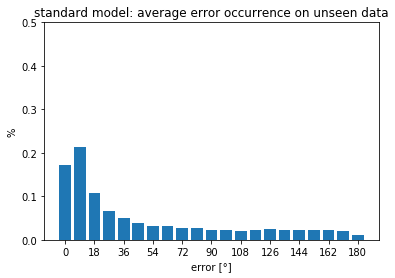

49% of predictions are correct within 27°
60% of predictions are correct within 45°
76% of predictions are correct within 90°


In [11]:
#ERROR OCCURENCE
x_as = np.array(range(21))
avg_occuring_errors = occuring_errors/(labels.shape[0])
plt.bar(x_as,avg_occuring_errors)
plt.title('standard model: average error occurrence on unseen data')
plt.ylabel('%')
plt.ylim([0,0.5])
plt.xlabel('error [°]')
plt.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180])
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/std_model_error_unseen_data'
plt.savefig(f'{save_fig_file_path}.png')
plt.show();
error_27 = np.sum(avg_occuring_errors[0:3])
print(f'{int(error_27*100)}% of predictions are correct within 27°')
error_45 = np.sum(avg_occuring_errors[0:5])
print(f'{int(error_45*100)}% of predictions are correct within 45°')
error_90 = np.sum(avg_occuring_errors[0:10])
print(f'{int(error_90*100)}% of predictions are correct within 90°')

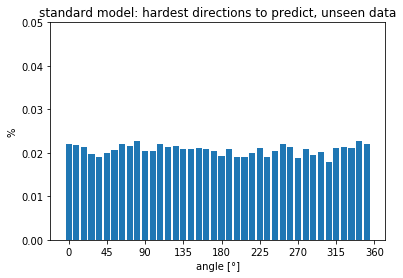

In [16]:
#HARDEST TO PREDICT
x_as = np.array(range(40))
avg_hardest_to_predict = hardest_to_predict/(labels.shape[0])
plt.bar(x_as,avg_hardest_to_predict)
plt.title('standard model: hardest directions to predict, unseen data')
plt.ylabel('%')
# plt.ylim([0,0.025])
plt.ylim([0,0.05])
plt.xlabel('angle [°]')
plt.xticks([0,5,10,15,20,25,30,35,40], [ 0,45,90,135,180,225,270,315,360])
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/std_model_hardest_dir'
# plt.savefig(f'{save_fig_file_path}.png')
plt.show();

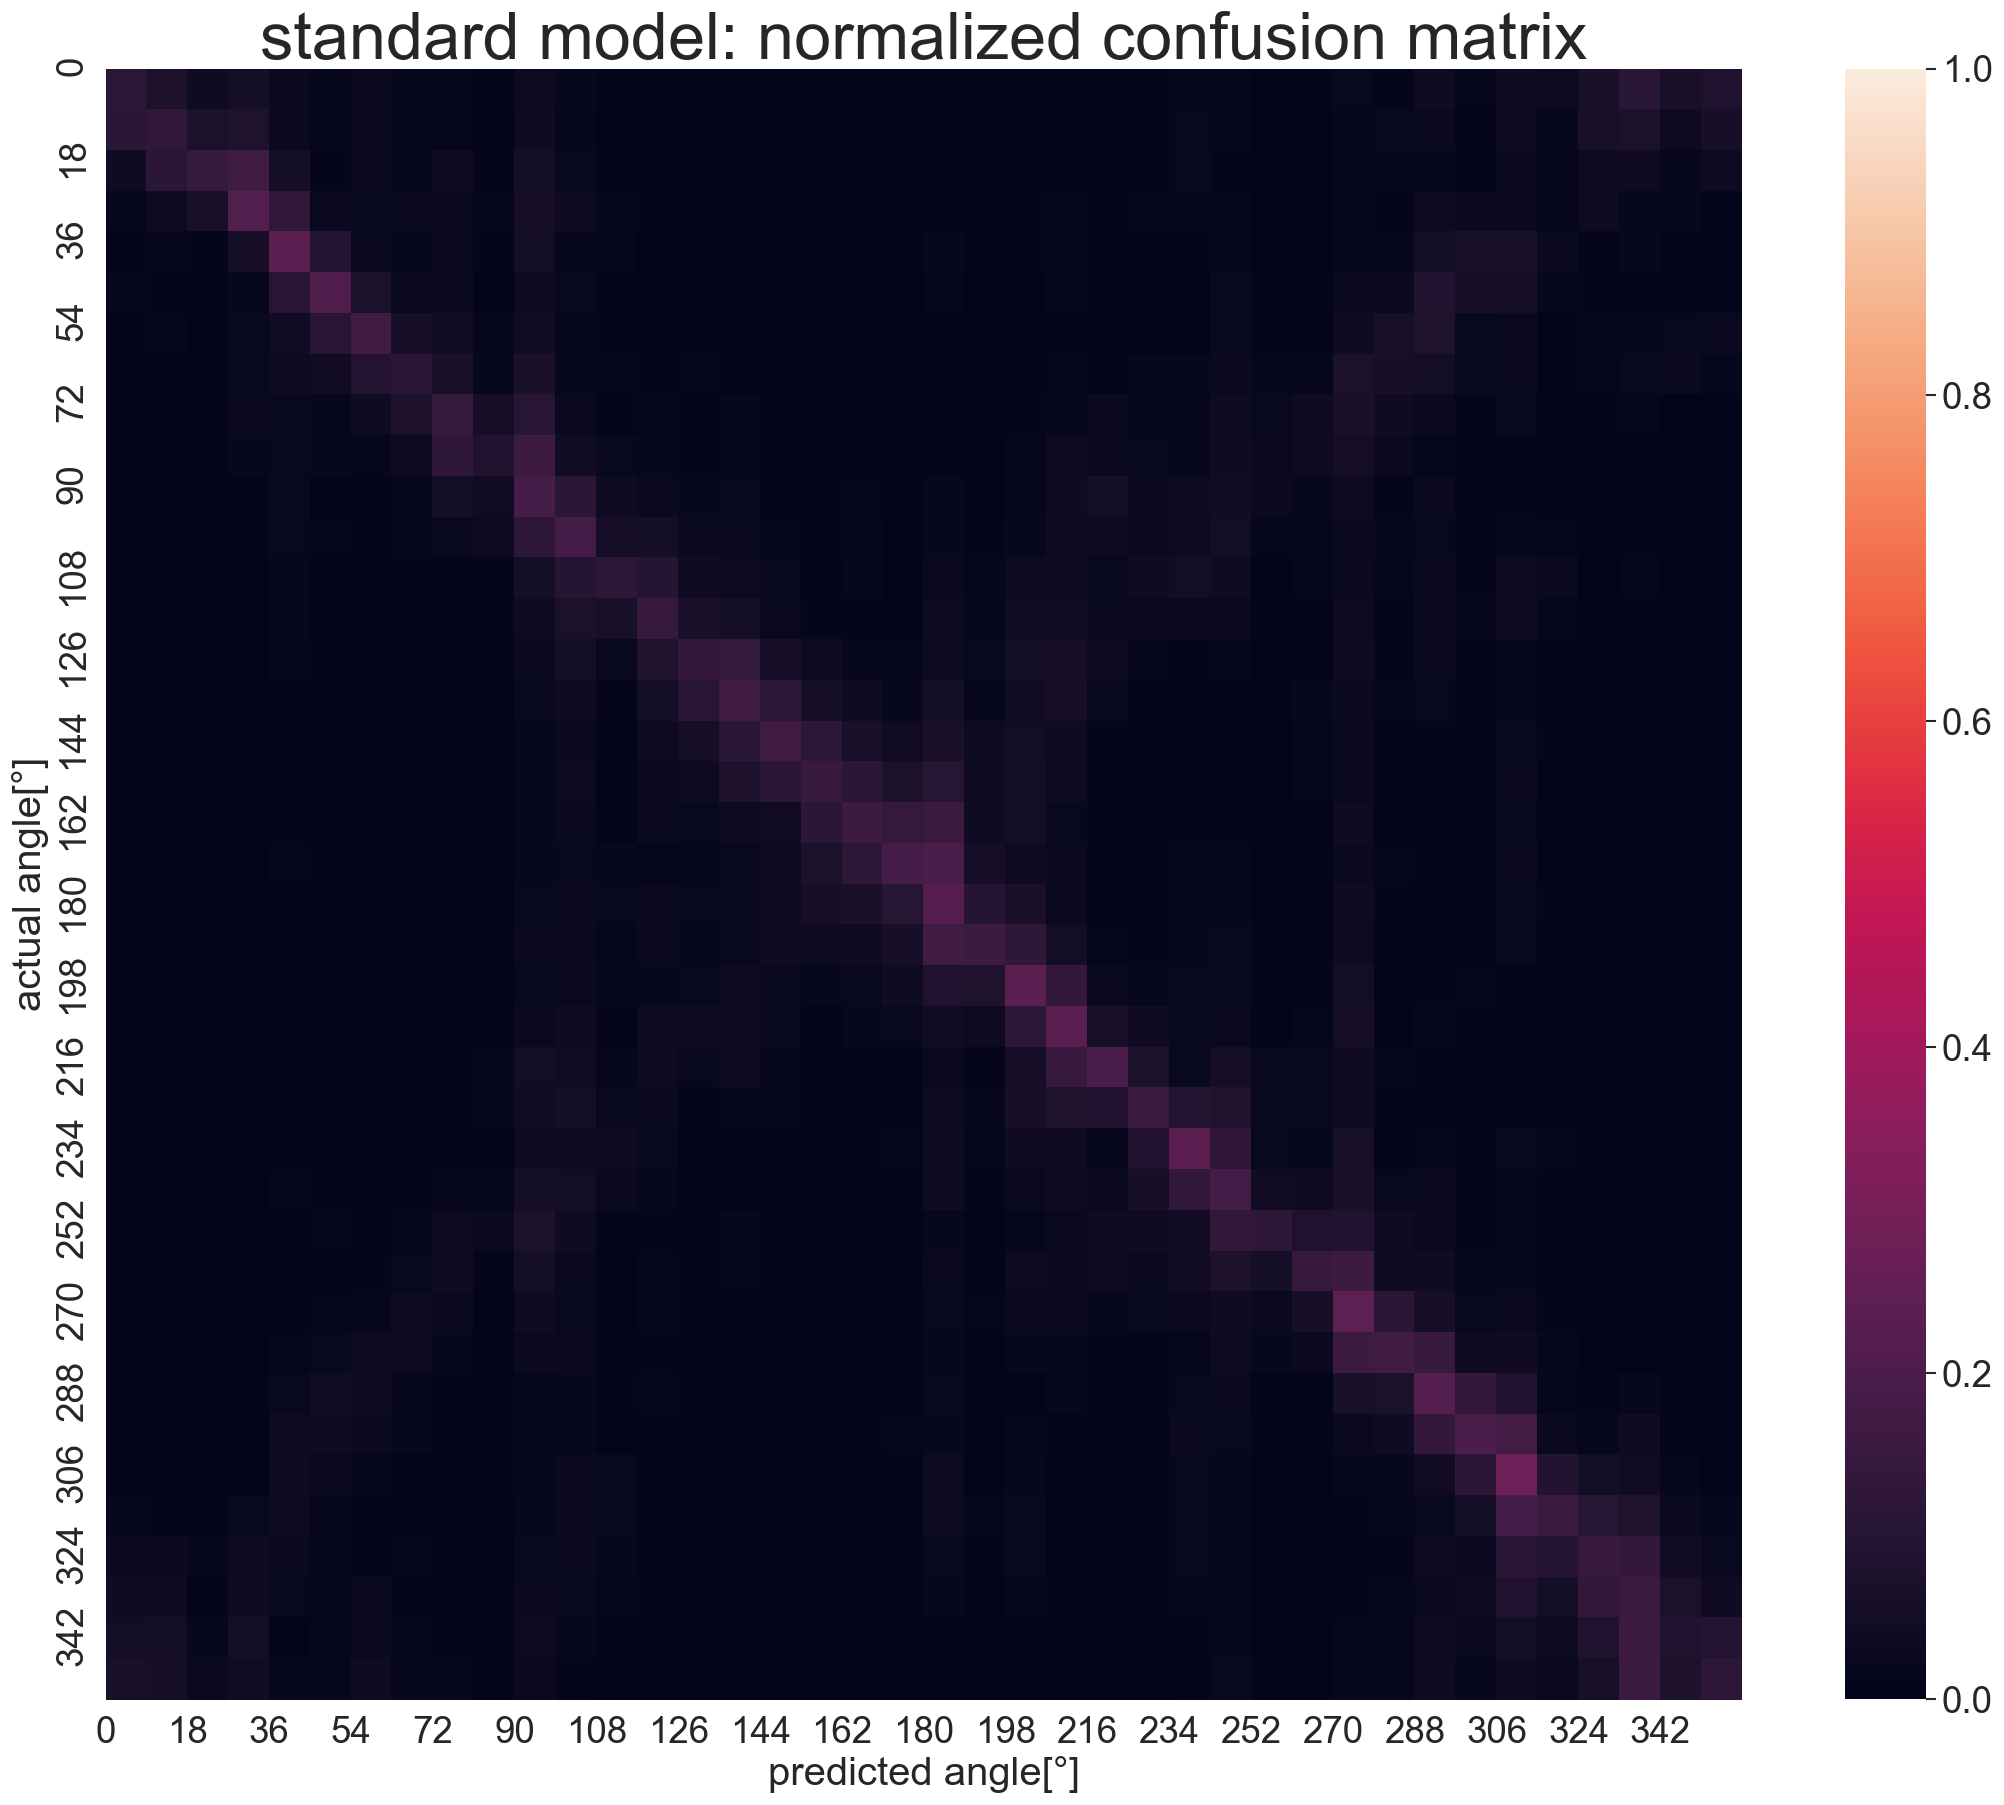

In [13]:
#CONFUSION MATRIX
df_cm = pd.DataFrame(confusion_array, range(40), range(40))
norm_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]
df_cm = norm_cm
plt.figure(figsize=(22,18),dpi=120)
sn.set(font_scale=2) # for label size
# sn.heatmap(df_cm, annot=True, annot_kws={"size": 5}) # font size
sn.heatmap(df_cm,vmin=0,vmax=1) # font size
plt.yticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28,30,32,34,36,38], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180,198,216,234,252,270,288,306,324,342])
plt.xlabel('predicted angle[°]')
plt.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28,30,32,34,36,38], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180,198,216,234,252,270,288,306,324,342])
plt.ylabel('actual angle[°]')
plt.title('standard model: normalized confusion matrix',fontsize=40)
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/std_model_confusion'
# plt.savefig(f'{save_fig_file_path}.png')
plt.show()

label:
32
predicted:
32


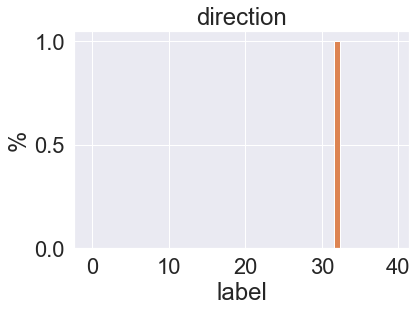

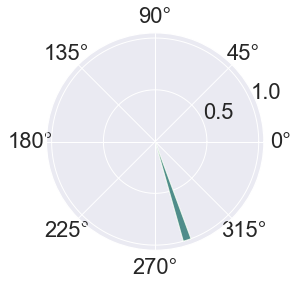

In [14]:
#RANDOMLY SELECT 1 INDEX AND COMPARE THE LABEL VS THE PREDICTION
index = randrange(0,X.shape[0])
label = y[index]
print("label:")
print(label)
print("predicted:")
print(np.argmax(predictions[index]))
#linear bar plot
plt.bar(np.arange(len(predictions[index,:])),predictions[index,:], align='center', alpha=1)
labels = np.zeros((40,))
labels[label] = np.amax(predictions[index])
plt.bar(np.arange(len(predictions[index,:])),labels[:], align='center', alpha=1)
plt.ylabel('%')
plt.xlabel('label')
plt.title('direction')
plt.show()
#polar bar plot
N = 40
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = np.pi / 40 

ax = plt.subplot(111, projection='polar')
ax.bar(theta, predictions[index,:], width=width, color='b', bottom=0.0, alpha=1)
ax.bar(theta, labels[:], width=width, color='g', bottom=0.0, alpha=0.5)
plt.show()

In [19]:
#method to aggregate predictions: make prediction based on surrounding probabilities
#go around 360° or 40labels
#sum current probabilitye, preivous 2 probabilities and next 2 probabilities to get resolution of 45°
def smart_prediction(predictions):
    be = np.zeros(40)
    for i in range(40):
        #2 back
        index = i-2
        if index < 0:
            index = 40+i-2
        predicted_b2 = predictions[index]
        index = i
        #1 back
        index = i-1
        if index < 0:
            index = 40+i-1
        predicted_b1 = predictions[index]
        index = i
        #current
        predicted = predictions[index]
        #1 forward
        index = i+1
        if index > 39:
            index = 0
        predicted_f1 = predictions[index]
        index = i
        #2 forward
        index = i+2
        if index > 39:
            index = 0+1-(39-i)
        predicted_f2 = predictions[index]
        
        s = (predicted_b2 + predicted_b1 + predicted + predicted_f1 + predicted_f2)
        be[i] = s
    return np.argmax(be)

label: 0 	 predict: 29	 error: 11
label: 0 	 predict: 29	 error: 11	 smart_predict: 28	 smart_error: 12


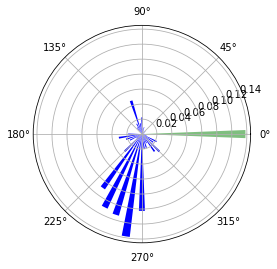

0_h_100_speech-us-gov-0002.wav

label: 9 	 predict: 11	 error: 2
label: 4 	 predict: 32	 error: 12
label: 4 	 predict: 32	 error: 12	 smart_predict: 30	 smart_error: 14


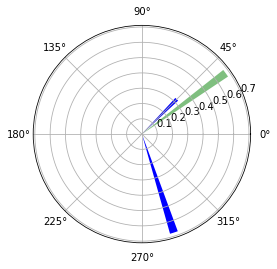

36_h_50_speech-us-gov-0068.wav

label: 12 	 predict: 35	 error: 17
label: 12 	 predict: 35	 error: 17	 smart_predict: 34	 smart_error: 18


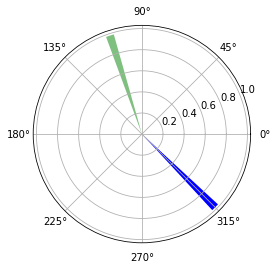

108_h_1000_speech-us-gov-0092.wav

label: 19 	 predict: 17	 error: 2
label: 14 	 predict: 24	 error: 10
label: 14 	 predict: 24	 error: 10	 smart_predict: 23	 smart_error: 9


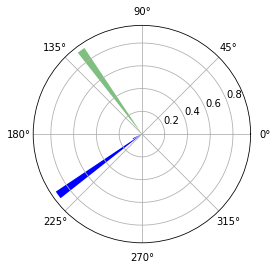

126_h_500_speech-librivox-0154.wav

label: 2 	 predict: 24	 error: 18
label: 2 	 predict: 24	 error: 18	 smart_predict: 24	 smart_error: 18


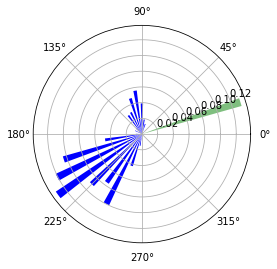

18_h_100_speech-us-gov-0239.wav

label: 16 	 predict: 33	 error: 17
label: 16 	 predict: 33	 error: 17	 smart_predict: 32	 smart_error: 16


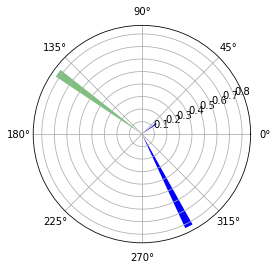

144_h_500_speech-us-gov-0039.wav

label: 35 	 predict: 37	 error: 2
label: 19 	 predict: 19
label: 13 	 predict: 14	 error: 1
label: 23 	 predict: 21	 error: 2
label: 7 	 predict: 9	 error: 2
label: 9 	 predict: 1	 error: 8
label: 9 	 predict: 1	 error: 8	 smart_predict: 1	 smart_error: 8


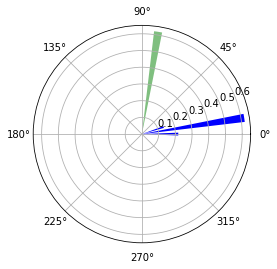

81_h_100_4243-187024-0027.wav

label: 24 	 predict: 21	 error: 3
label: 12 	 predict: 34	 error: 18
label: 12 	 predict: 34	 error: 18	 smart_predict: 35	 smart_error: 17


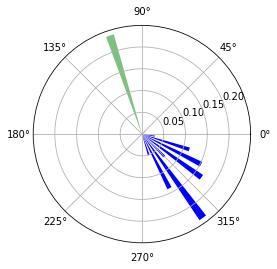

108_h_1000_speech-us-gov-0018.wav

label: 7 	 predict: 39	 error: 8
label: 7 	 predict: 39	 error: 8	 smart_predict: 39	 smart_error: 8


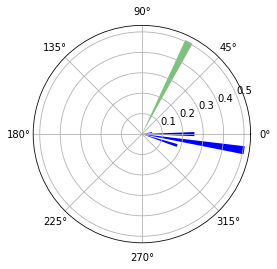

63_h_10_music-jamendo-0073.wav

label: 19 	 predict: 5	 error: 14
label: 19 	 predict: 5	 error: 14	 smart_predict: 4	 smart_error: 15


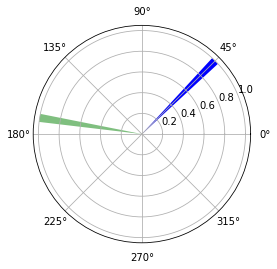

171_h_1000_music-rfm-0074.wav

label: 0 	 predict: 39	 error: 1
label: 11 	 predict: 32	 error: 19
label: 11 	 predict: 32	 error: 19	 smart_predict: 31	 smart_error: 20


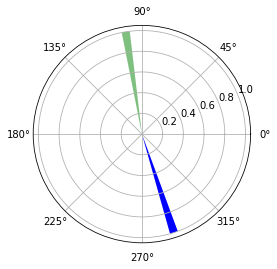

99_h_100_speech-librivox-0102.wav

label: 5 	 predict: 6	 error: 1
label: 2 	 predict: 11	 error: 9
label: 2 	 predict: 11	 error: 9	 smart_predict: 11	 smart_error: 9


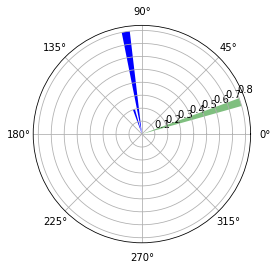

18_h_10_speech-us-gov-0248.wav

label: 9 	 predict: 5	 error: 4
label: 19 	 predict: 19
label: 5 	 predict: 5
label: 14 	 predict: 24	 error: 10
label: 14 	 predict: 24	 error: 10	 smart_predict: 22	 smart_error: 8


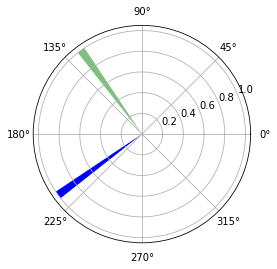

126_h_10_speech-us-gov-0094.wav

label: 6 	 predict: 31	 error: 15
label: 6 	 predict: 31	 error: 15	 smart_predict: 30	 smart_error: 16


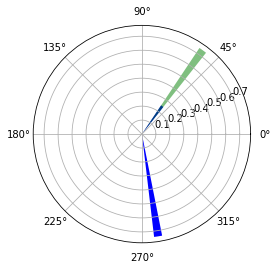

54_h_50_speech-us-gov-0131.wav

label: 21 	 predict: 18	 error: 3
label: 5 	 predict: 5
label: 23 	 predict: 23
label: 28 	 predict: 34	 error: 6
label: 28 	 predict: 34	 error: 6	 smart_predict: 35	 smart_error: 7


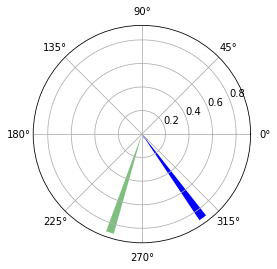

252_h_500_speech-librivox-0084.wav

label: 6 	 predict: 31	 error: 15
label: 6 	 predict: 31	 error: 15	 smart_predict: 29	 smart_error: 17


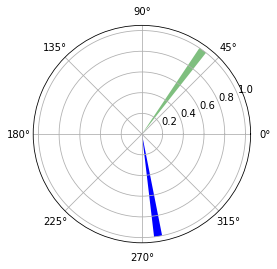

54_h_10_speech-us-gov-0044.wav

label: 35 	 predict: 30	 error: 5
label: 2 	 predict: 2
label: 20 	 predict: 16	 error: 4
label: 39 	 predict: 24	 error: 15
label: 39 	 predict: 24	 error: 15	 smart_predict: 25	 smart_error: 14


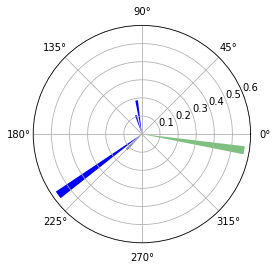

351_h_1000_speech-us-gov-0239.wav

label: 9 	 predict: 9
label: 9 	 predict: 3	 error: 6
label: 9 	 predict: 3	 error: 6	 smart_predict: 2	 smart_error: 7


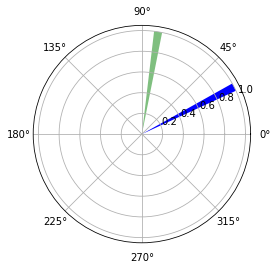

81_h_100_speech-librivox-0126.wav

label: 23 	 predict: 29	 error: 6
label: 23 	 predict: 29	 error: 6	 smart_predict: 28	 smart_error: 5


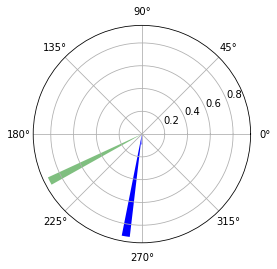

207_h_10_speech-us-gov-0175.wav

label: 24 	 predict: 8	 error: 16
label: 24 	 predict: 8	 error: 16	 smart_predict: 7	 smart_error: 17


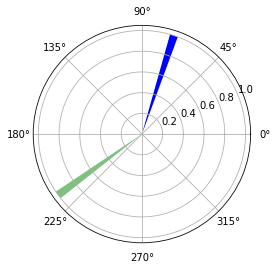

216_h_500_music-jamendo-0214.wav

label: 22 	 predict: 31	 error: 9
label: 22 	 predict: 31	 error: 9	 smart_predict: 30	 smart_error: 8


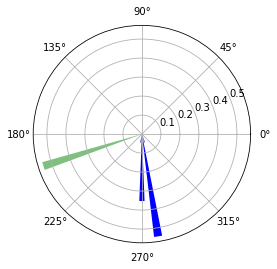

198_h_500_speech-us-gov-0025.wav

label: 36 	 predict: 34	 error: 2
label: 2 	 predict: 7	 error: 5
label: 26 	 predict: 27	 error: 1
label: 16 	 predict: 15	 error: 1
label: 23 	 predict: 22	 error: 1
label: 16 	 predict: 21	 error: 5
label: 11 	 predict: 23	 error: 12
label: 11 	 predict: 23	 error: 12	 smart_predict: 23	 smart_error: 12


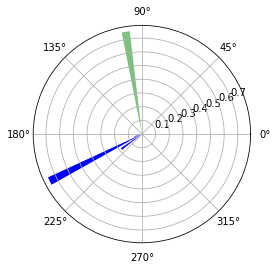

99_h_10_speech-us-gov-0150.wav

label: 5 	 predict: 6	 error: 1
label: 28 	 predict: 32	 error: 4
label: 2 	 predict: 3	 error: 1
label: 1 	 predict: 3	 error: 2
label: 4 	 predict: 38	 error: 6
label: 4 	 predict: 38	 error: 6	 smart_predict: 38	 smart_error: 6


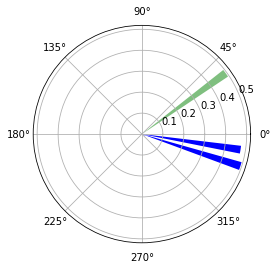

36_h_50_speech-librivox-0075.wav

label: 21 	 predict: 22	 error: 1
label: 1 	 predict: 2	 error: 1
label: 21 	 predict: 31	 error: 10
label: 21 	 predict: 31	 error: 10	 smart_predict: 30	 smart_error: 9


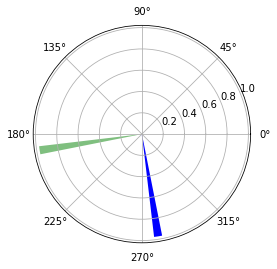

189_h_100_speech-librivox-0058.wav

label: 1 	 predict: 39	 error: 2
label: 26 	 predict: 11	 error: 15
label: 26 	 predict: 11	 error: 15	 smart_predict: 10	 smart_error: 16


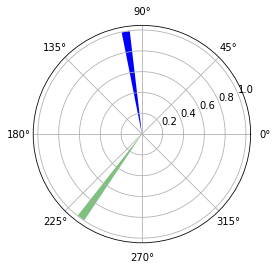

234_h_1000_speech-us-gov-0009.wav

label: 11 	 predict: 23	 error: 12
label: 11 	 predict: 23	 error: 12	 smart_predict: 23	 smart_error: 12


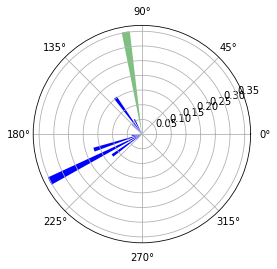

99_h_10_speech-us-gov-0148.wav

label: 8 	 predict: 1	 error: 7
label: 8 	 predict: 1	 error: 7	 smart_predict: 1	 smart_error: 7


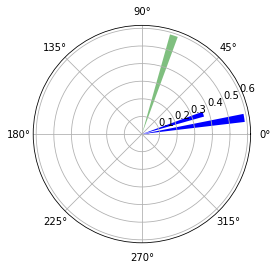

72_h_50_8266-279363-0007.wav

label: 26 	 predict: 6	 error: 20
label: 26 	 predict: 6	 error: 20	 smart_predict: 6	 smart_error: 20


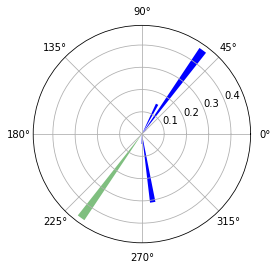

234_h_10_8699-291107-0095.wav

label: 9 	 predict: 7	 error: 2
label: 1 	 predict: 24	 error: 17
label: 1 	 predict: 24	 error: 17	 smart_predict: 25	 smart_error: 16


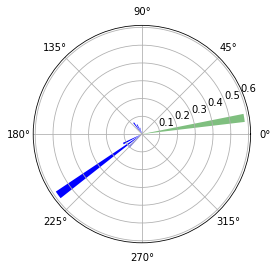

9_h_500_speech-us-gov-0173.wav

label: 26 	 predict: 31	 error: 5
label: 20 	 predict: 20
label: 2 	 predict: 3	 error: 1
label: 35 	 predict: 35
label: 27 	 predict: 29	 error: 2
label: 30 	 predict: 31	 error: 1
label: 30 	 predict: 5	 error: 15
label: 30 	 predict: 5	 error: 15	 smart_predict: 3	 smart_error: 13


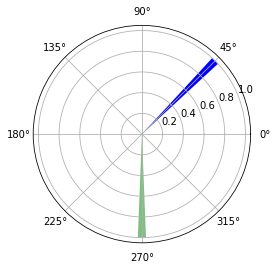

270_h_100_speech-librivox-0028.wav

label: 6 	 predict: 17	 error: 11
label: 6 	 predict: 17	 error: 11	 smart_predict: 17	 smart_error: 11


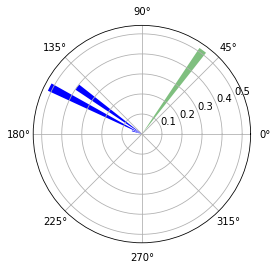

54_h_1000_speech-us-gov-0237.wav

label: 3 	 predict: 30	 error: 13
label: 3 	 predict: 30	 error: 13	 smart_predict: 30	 smart_error: 13


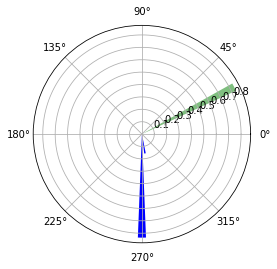

27_h_50_speech-us-gov-0240.wav

label: 2 	 predict: 4	 error: 2
label: 12 	 predict: 12
label: 5 	 predict: 31	 error: 14
label: 5 	 predict: 31	 error: 14	 smart_predict: 29	 smart_error: 16


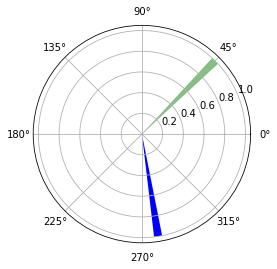

45_h_1000_speech-us-gov-0064.wav

label: 39 	 predict: 39
label: 16 	 predict: 16
label: 38 	 predict: 35	 error: 3
label: 18 	 predict: 13	 error: 5
label: 30 	 predict: 26	 error: 4
label: 28 	 predict: 11	 error: 17
label: 28 	 predict: 11	 error: 17	 smart_predict: 12	 smart_error: 16


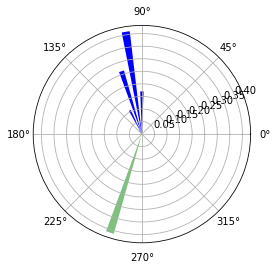

252_h_100_music-jamendo-0175.wav

label: 1 	 predict: 6	 error: 5
label: 0 	 predict: 29	 error: 11
label: 0 	 predict: 29	 error: 11	 smart_predict: 29	 smart_error: 11


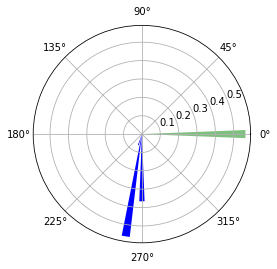

0_h_100_speech-us-gov-0226.wav

label: 16 	 predict: 13	 error: 3
label: 8 	 predict: 38	 error: 10
label: 8 	 predict: 38	 error: 10	 smart_predict: 37	 smart_error: 11


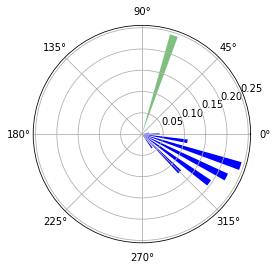

72_h_100_music-jamendo-0001.wav

label: 34 	 predict: 29	 error: 5
label: 30 	 predict: 29	 error: 1
label: 18 	 predict: 32	 error: 14
label: 18 	 predict: 32	 error: 14	 smart_predict: 31	 smart_error: 13


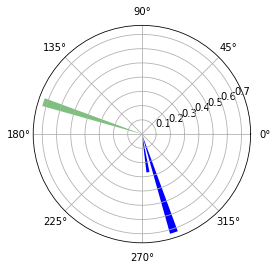

162_h_50_speech-librivox-0104.wav

label: 37 	 predict: 1	 error: 4
label: 37 	 predict: 4	 error: 7
label: 37 	 predict: 4	 error: 7	 smart_predict: 3	 smart_error: 6


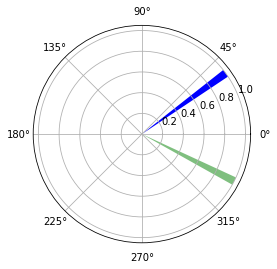

333_h_50_speech-librivox-0076.wav

label: 27 	 predict: 32	 error: 5
label: 27 	 predict: 30	 error: 3
label: 0 	 predict: 21	 error: 19
label: 0 	 predict: 21	 error: 19	 smart_predict: 22	 smart_error: 18


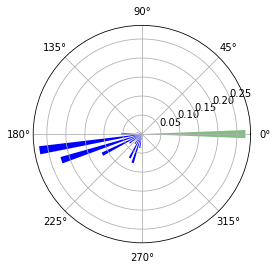

0_h_100_speech-us-gov-0239.wav

label: 3 	 predict: 3
label: 11 	 predict: 6	 error: 5
label: 25 	 predict: 25
label: 19 	 predict: 21	 error: 2
label: 5 	 predict: 37	 error: 8
label: 5 	 predict: 37	 error: 8	 smart_predict: 36	 smart_error: 9


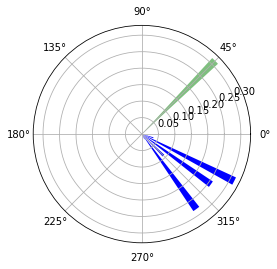

45_h_500_music-jamendo-0108.wav

label: 4 	 predict: 35	 error: 9
label: 4 	 predict: 35	 error: 9	 smart_predict: 34	 smart_error: 10


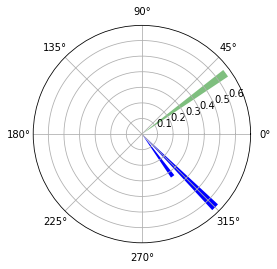

36_h_500_music-fma-0103.wav

label: 8 	 predict: 9	 error: 1
41 of 100 were off by more than 45°
average error is 7.0 or 63.0°
max error is 20 or 180°


In [21]:
#RANDOMLY SELECT A HUNDRED SAMPLES AND PLOT THOSE WHO ARE OF BY MORE THAN 45° AND SAVE THOSE
save_fig_location = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/Mel_scale/unseen'
counter = 0
randomIndexes = random.sample(range(0,X.shape[0]),100)
allErrors = []
for index in randomIndexes:
    label = y[index]
    predicted = np.argmax(predictions[index])
    output = f'label: {label} \t predict: {predicted}'
    error = absolute_diff(predicted,label)
    error = absolute_diff(predicted,label)
    if error != 0:
        output += f'\t error: {error}'
        allErrors.append(error)
    print(output)
    if error >5:
        smart_pred = smart_prediction(predictions[index])
        output += f'\t smart_predict: {smart_pred}'
        smart_error = absolute_diff(smart_pred,label)
        output += f'\t smart_error: {smart_error}'
        print(output)
        labels = np.zeros((40,))
        labels[label] = np.amax(predictions[index])
        ax = plt.subplot(111, projection='polar')
        ax.bar(theta, predictions[index,:], width=width, color='b', bottom=0.0, alpha=1)
        ax.bar(theta, labels[:], width=width, color='g', bottom=0.0, alpha=0.5)
#         plt.savefig(f'{save_fig_location}/{fileNames.iloc[index]}.png')
        plt.show()
        print(fileNames.iloc[index])
        print()
        counter += 1
print(f'{counter} of {len(randomIndexes)} were off by more than 45°')
allErrors = np.array(allErrors)
m_mean = np.round(np.mean(allErrors))
m_max = np.amax(allErrors)
print(f'average error is {m_mean} or {m_mean*9}°')
print(f'max error is {m_max} or {m_max*9}°')